<a href="https://colab.research.google.com/github/WillDera/Analysis_on_Fuel_Data/blob/master/Data_Analysis_on_fuel_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# fetching our data
url = "https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv?raw=True"
fuel_data = pd.read_csv(url, error_bad_lines=False)

In [3]:
# getting a quick summary of the dataset
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [5]:
# get shape of the dataset
fuel_data.shape

(29523, 11)

In [6]:
# check for missing values
fuel_data.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [7]:
# lets get the percentage of na values in the fuel unit column
fuel_data.isna().mean().round(4) * 100

record_id                       0.00
utility_id_ferc1                0.00
report_year                     0.00
plant_name_ferc1                0.00
fuel_type_code_pudl             0.00
fuel_unit                       0.61
fuel_qty_burned                 0.00
fuel_mmbtu_per_unit             0.00
fuel_cost_per_unit_burned       0.00
fuel_cost_per_unit_delivered    0.00
fuel_cost_per_mmbtu             0.00
dtype: float64

In [9]:
# to be sure lets get the percentage of non-missing values
fuel_data.count() / len(fuel_data) * 100

record_id                       100.000000
utility_id_ferc1                100.000000
report_year                     100.000000
plant_name_ferc1                100.000000
fuel_type_code_pudl             100.000000
fuel_unit                        99.390306
fuel_qty_burned                 100.000000
fuel_mmbtu_per_unit             100.000000
fuel_cost_per_unit_burned       100.000000
fuel_cost_per_unit_delivered    100.000000
fuel_cost_per_mmbtu             100.000000
dtype: float64

In [10]:
# use groupby to count the sum of each unique value in the fuel unit column
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [11]:
# since mcf is the highest occuring we'd use it to fill the missing values
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value="mcf")

In [12]:
# check for percentage of non-missing values
fuel_data.count() / len(fuel_data) * 100

record_id                       100.0
utility_id_ferc1                100.0
report_year                     100.0
plant_name_ferc1                100.0
fuel_type_code_pudl             100.0
fuel_unit                       100.0
fuel_qty_burned                 100.0
fuel_mmbtu_per_unit             100.0
fuel_cost_per_unit_burned       100.0
fuel_cost_per_unit_delivered    100.0
fuel_cost_per_mmbtu             100.0
dtype: float64

In [13]:
# taking a look at our dataset (print the first 30 rows)
fuel_data.head(30)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.240,43.250,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.770,0.000,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.540,55.130,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.970,34.650,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233.0,22.484000,28.730,28.110,1.278


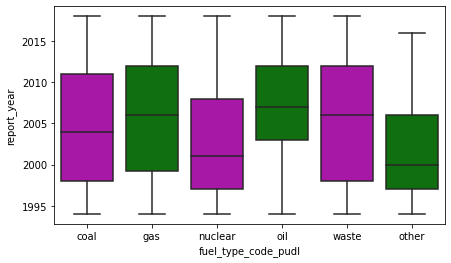

In [14]:
# box plot showing the fuel type based on report year
plt.figure(figsize=(7, 4))
sns.boxplot(x="fuel_type_code_pudl", y="report_year", palette=["m", "g"], data=fuel_data)

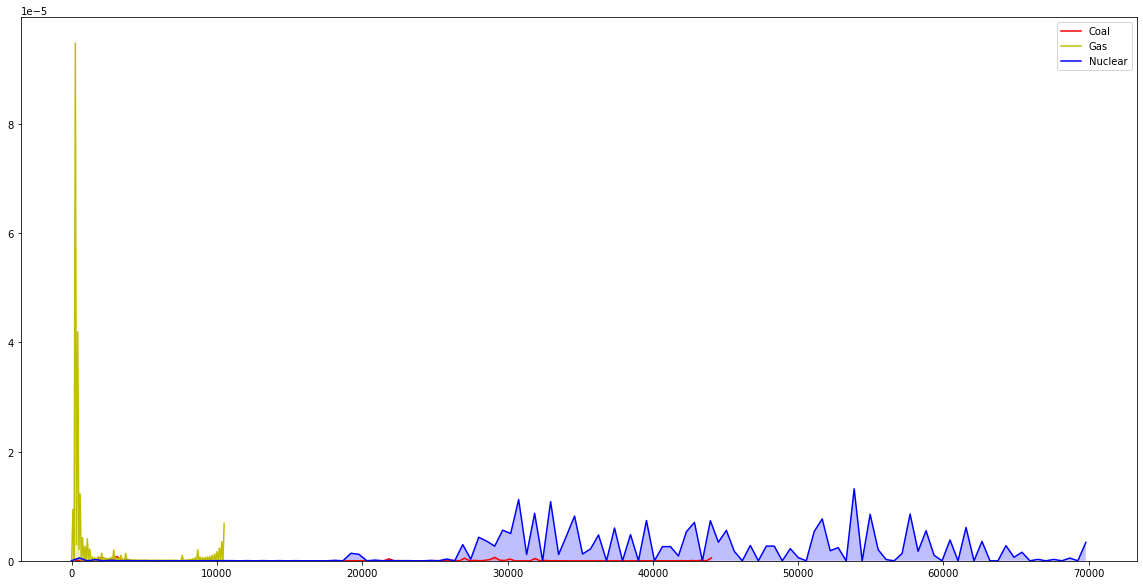

In [37]:
# KDE plot for fuel type used more Coal, Gas and Nuclear energy
plt.figure(figsize=(20, 10))
sns.kdeplot(fuel_data.loc[(fuel_data['fuel_type_code_pudl']=='coal'), 'fuel_cost_per_unit_burned'], color='r', shade=True, Label='Coal')
sns.kdeplot(fuel_data.loc[(fuel_data['fuel_type_code_pudl']=='gas'), 'fuel_cost_per_unit_burned'], color='y', shade=True, Label='Gas')
sns.kdeplot(fuel_data.loc[(fuel_data['fuel_type_code_pudl']=='nuclear'), 'fuel_cost_per_unit_burned'], color='b', shade=True, Label='Nuclear')


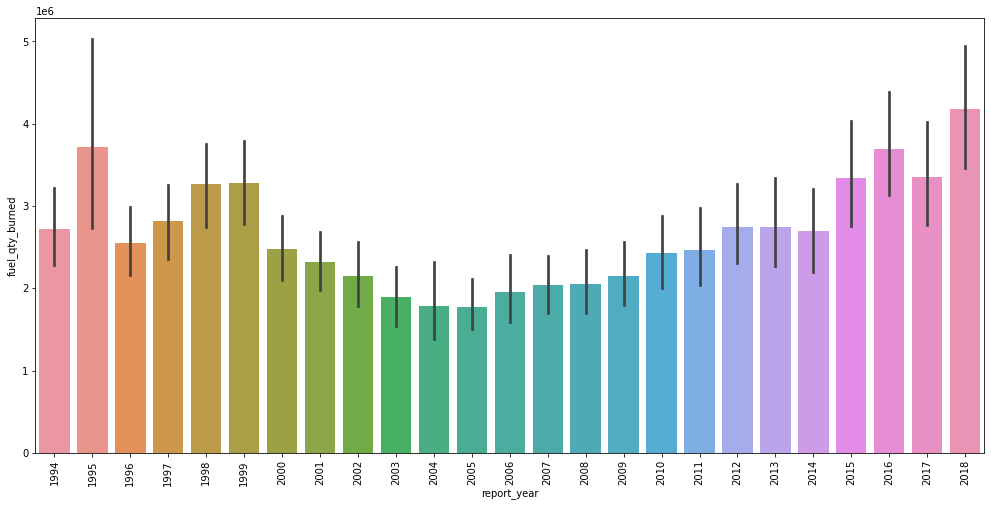

In [38]:
# barplot of fuel quantity burned per year in the dataset
plt.figure(figsize=(17, 8))
plt.xticks(rotation=90)
sns.barplot(data=fuel_data, x='report_year', y='fuel_qty_burned')
# plt(fuel_data["report_year"], fuel_data["fuel_qty_burned"])

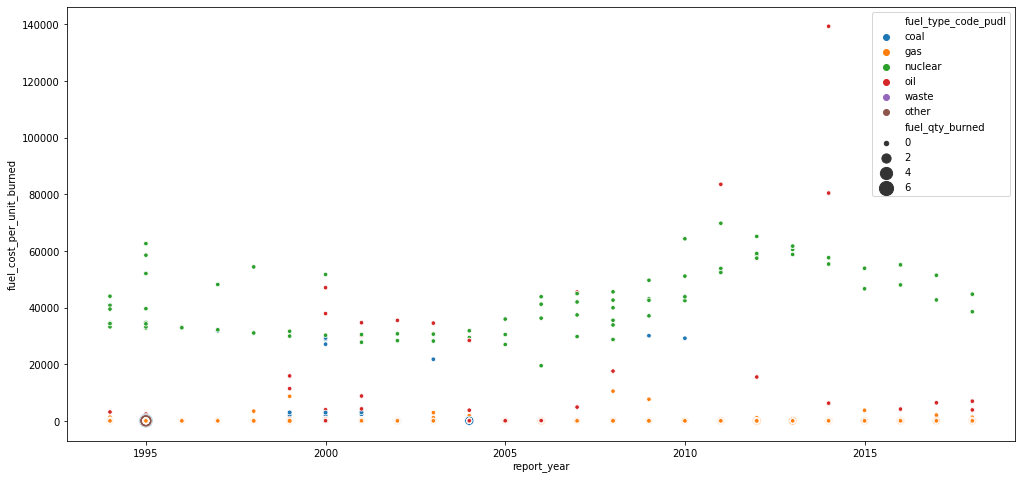

In [39]:
# scatter plot of fuel cost per unit burned for each year and showing the fuel type from the dataset
df = fuel_data

# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
plt.figure(figsize=(17, 8))
ax = sns.scatterplot(x="report_year", y="fuel_cost_per_unit_burned",
                     hue="fuel_type_code_pudl", size="fuel_qty_burned",
                    sizes=(20, 200),
                     data=fuel_data)

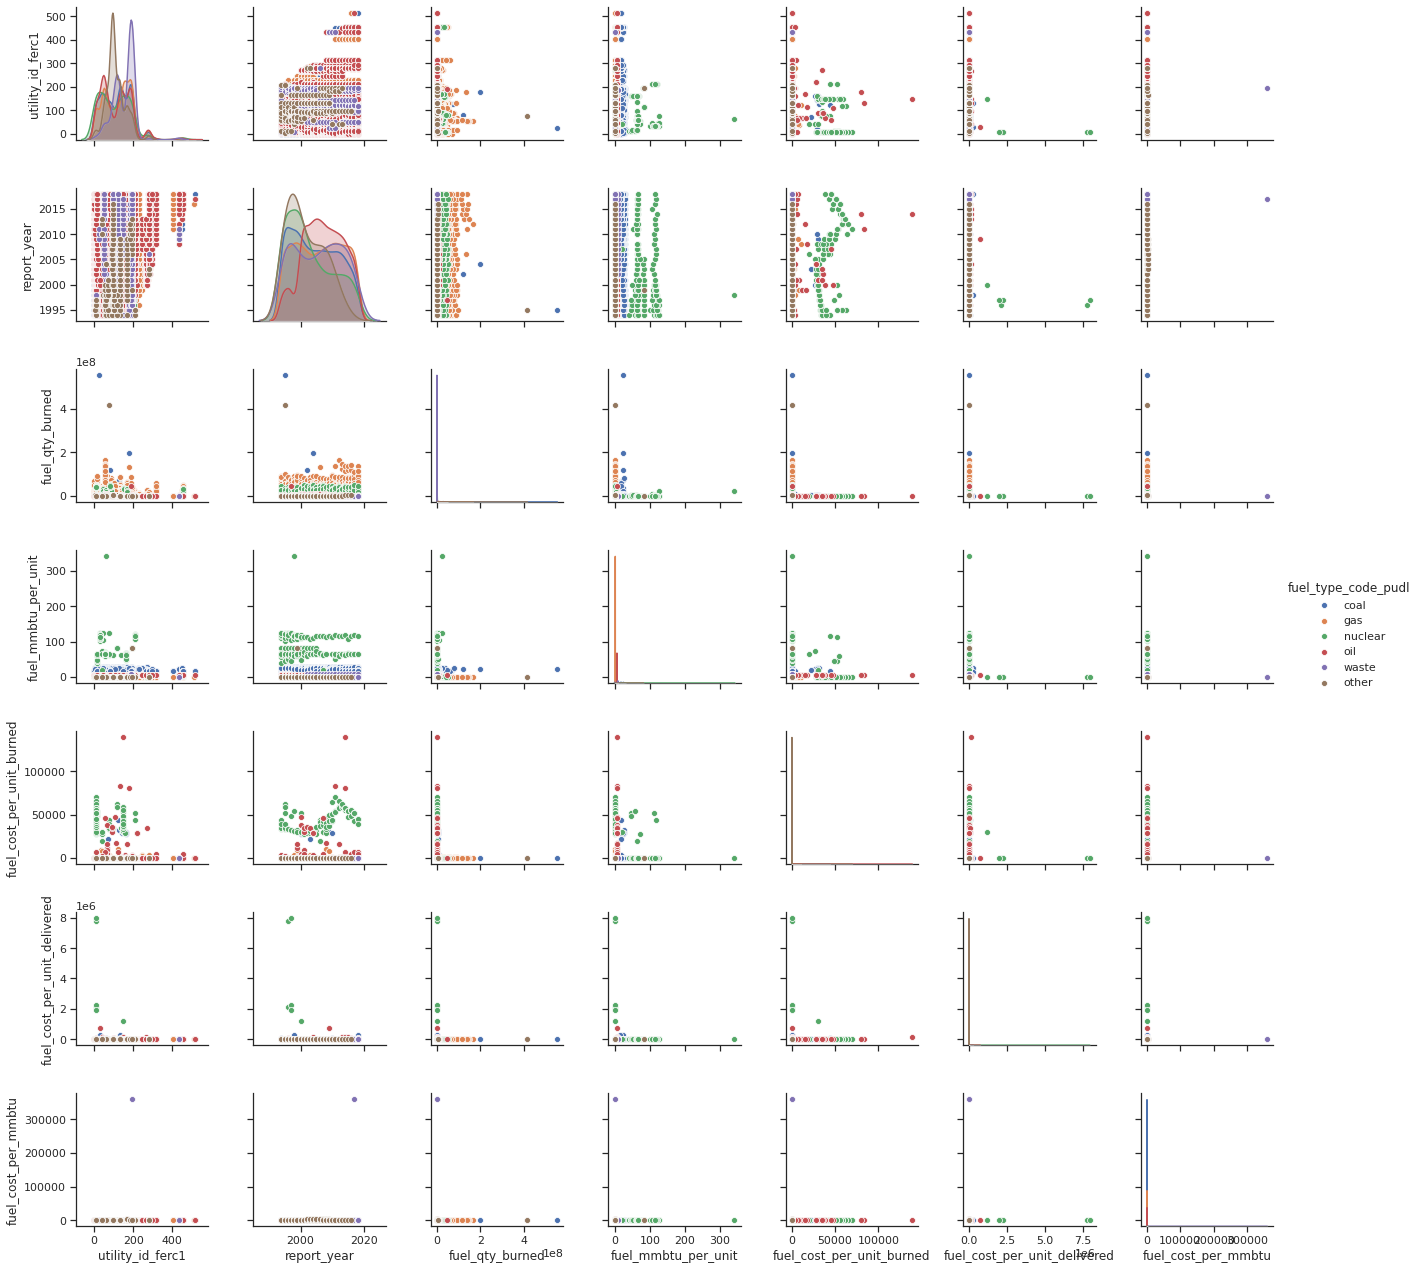

In [48]:
# scatterplot matrix of all sections on the dataset with respect to the fuel types
sns.set(style="ticks")

df = fuel_data
sns.pairplot(df, hue="fuel_type_code_pudl")

TypeError: ignored